<a href="https://colab.research.google.com/github/atishayj4in/Stock_Price_Prediction_Model/blob/main/StockPricePredictionModel_by_AtishayJain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Stock Price Prediction Model by Atishay Jain***

---

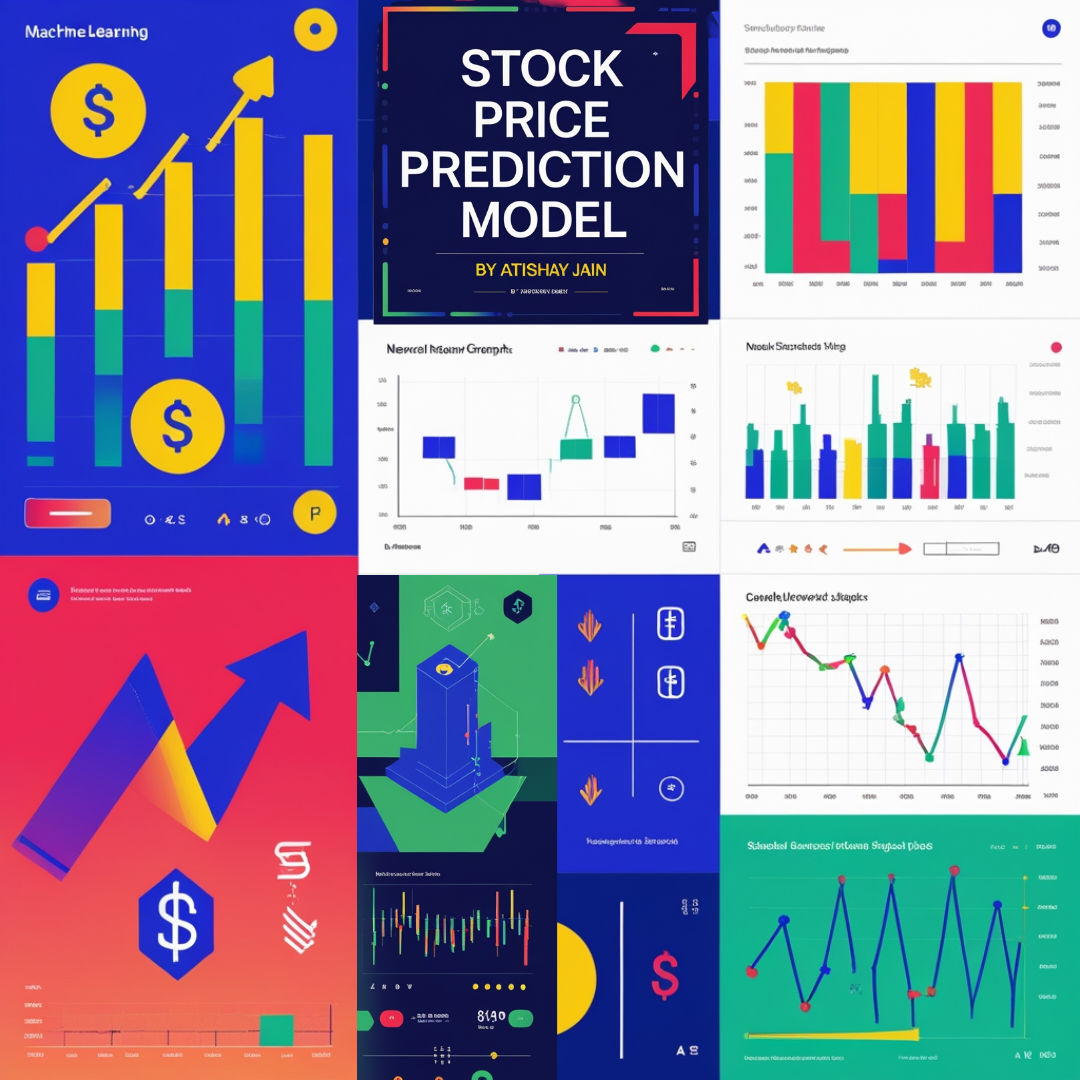

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [3]:
X_list = []
y_list = []

# Loop through all files
folder_path = "/content/stocks"  # adjust path if needed
for file in tqdm(os.listdir(folder_path)):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder_path, file))

        if df.shape[0] < 2:
            continue  # skip very short files

        df['Next_Close'] = df['Close'].shift(-1)
        df = df.dropna()

        features = ['Open', 'High', 'Low', 'Close', 'Volume']
        if all(col in df.columns for col in features):
            X_list.append(df[features])
            y_list.append(df['Next_Close'])

# Combine all data
X_all = pd.concat(X_list, ignore_index=True)
y_all = pd.concat(y_list, ignore_index=True)

print("Total samples collected:", X_all.shape[0])


100%|██████████| 4101/4101 [00:56<00:00, 73.15it/s]


Total samples collected: 16885134


In [4]:
X_all

,Open,High,Low,Close,Volume
0,12.00,12.12,11.50,11.85,7605800.0
1,11.85,11.85,11.10,11.75,1046900.0
2,11.33,11.58,11.17,11.40,573000.0
3,11.27,11.49,10.61,11.00,1185700.0
4,10.85,10.93,10.63,10.80,653700.0
...,...,...,...,...,...
16885129,14.19,15.55,14.19,15.55,300.0
16885130,14.13,15.40,14.13,15.40,1000.0
16885131,15.30,15.30,15.30,15.30,900.0
16885132,15.15,15.15,15.13,15.14,1800.0


In [5]:
y_all

,Next_Close
0,11.75
1,11.40
2,11.00
3,10.80
4,10.75
...,...
16885129,15.40
16885130,15.30
16885131,15.14
16885132,15.00


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42
)

# Normalize features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 13508107
Testing samples: 3377027


In [7]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [8]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=1)

Epoch 1/5
94979/94979 ━━━━━━━━━━━━━━━━━━━━ 398s 4ms/step - loss: 2475299584.0000 - mae: 474.1928 - val_loss: 2253844480.0000 - val_mae: 422.8813
Epoch 2/5
94979/94979 ━━━━━━━━━━━━━━━━━━━━ 433s 4ms/step - loss: 2961345792.0000 - mae: 640.1272 - val_loss: 2755964416.0000 - val_mae: 432.8492
Epoch 3/5
94979/94979 ━━━━━━━━━━━━━━━━━━━━ 415s 4ms/step - loss: 3088785664.0000 - mae: 535.5084 - val_loss: 1185745280.0000 - val_mae: 338.6985
Epoch 4/5
94979/94979 ━━━━━━━━━━━━━━━━━━━━ 380s 4ms/step - loss: 3301477376.0000 - mae: 482.7095 - val_loss: 2386507008.0000 - val_mae: 485.2213
Epoch 5/5
94979/94979 ━━━━━━━━━━━━━━━━━━━━ 323s 3ms/step - loss: 3433118464.0000 - mae: 487.5144 - val_loss: 1703267328.0000 - val_mae: 423.9357


In [11]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: ₹{test_mae:.2f}")

105533/105533 ━━━━━━━━━━━━━━━━━━━━ 335s 3ms/step - loss: 2290113280.0000 - mae: 449.3061
Test MAE: ₹438.56


105533/105533 ━━━━━━━━━━━━━━━━━━━━ 164s 2ms/step


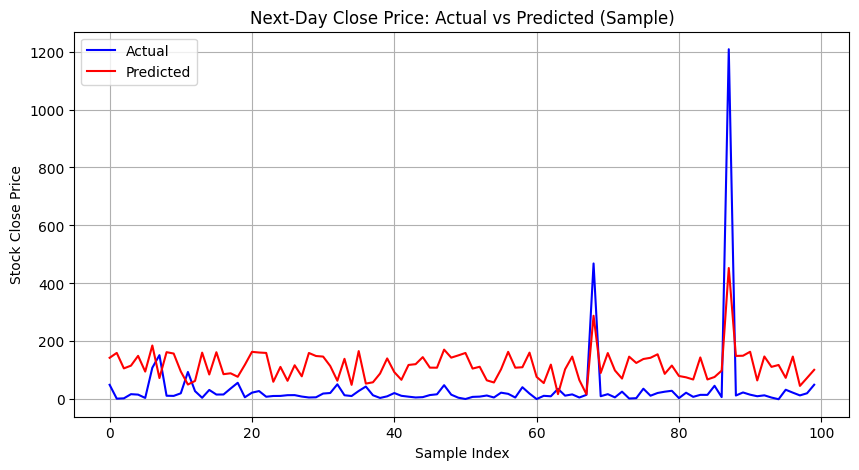

In [12]:
# Predict on test set
y_pred = model.predict(X_test_scaled).flatten()

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', color='blue')
plt.plot(y_pred[:100], label='Predicted', color='red')
plt.title("Next-Day Close Price: Actual vs Predicted (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Stock Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
model.save("stock_price_predictor.h5")

In [16]:
pip freeze > requirements.txt